In [102]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from IPython.display import display
import matplotlib.pyplot as plt
import scipy.stats as st
import statsmodels.api as sm
pd.options.display.max_columns = None ### shows all columns
df=pd.read_csv('NYCgov_Poverty_Measure_Data__2016_.csv')


C:\Users\Abhishek Nimmakayala\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### Handling missing data

[('ENG', 38015), ('ESR', 12198), ('EducAttain', 2240), ('JWTR', 36009), ('LANX', 3738), ('MSP', 11419), ('Off_Threshold', 2), ('SCHL', 2241), ('WKW', 32406)]


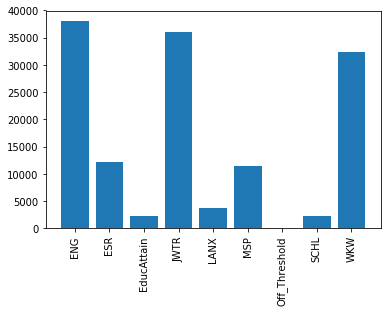

In [92]:
### count of missing data in each column and bar graph
df.columns
missing_values=[]
missing_cols=[]
for i in df.columns:
    if (len(df) - df[i].count()>0):
        missing_values.append(len(df) - df[i].count())
        missing_cols.append(i)
k=dict(zip(missing_cols,missing_values))
print(sorted(k.items()))
plt.bar(missing_cols,missing_values)
plt.xticks(missing_cols, missing_cols, rotation='vertical')
plt.show()

### Number of values in missing columns before imputation 

In [93]:
### Understsnding missing values
print(df.groupby('ENG').ENG.count())
print(df.groupby('ESR').ESR.count())
print(df.groupby('EducAttain').EducAttain.count())
print(df.groupby('JWTR').JWTR.count())
print(df.groupby('LANX').LANX.count())
print(df.groupby('MSP').MSP.count())
print(df.groupby('Off_Threshold').Off_Threshold.count())
print(df.groupby('SCHL').SCHL.count())
print(df.groupby('WKW').SCHL.count())



ENG
1.0    16275
2.0     6832
3.0     5366
4.0     2156
Name: ENG, dtype: int64
ESR
1.0    32618
2.0      875
3.0     2253
4.0       17
6.0    20683
Name: ESR, dtype: int64
EducAttain
1.0    20618
2.0    13081
3.0    12397
4.0    20308
Name: EducAttain, dtype: int64
JWTR
1.0      9632
2.0      3129
3.0        51
4.0     13938
5.0       553
6.0       114
7.0       272
8.0        43
9.0       413
10.0     2884
11.0     1405
12.0      201
Name: JWTR, dtype: int64
LANX
1.0    30629
2.0    34277
Name: LANX, dtype: int64
MSP
1.0    22420
2.0     2476
3.0     3347
4.0     4528
5.0     1613
6.0    22841
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

### Number of values in missing columns after imputation 

In [94]:
for i in missing_cols:
    df[i].fillna(method='ffill',inplace=True)
print(df.groupby('ENG').ENG.count())
print(df.groupby('ESR').ESR.count())
print(df.groupby('EducAttain').EducAttain.count())
print(df.groupby('JWTR').JWTR.count())
print(df.groupby('LANX').LANX.count())
print(df.groupby('MSP').MSP.count())
print(df.groupby('Off_Threshold').Off_Threshold.count())
print(df.groupby('SCHL').SCHL.count())
print(df.groupby('WKW').SCHL.count())

##
df.loc[0,'WKW']=1   ### hardcoded this as this is the first observation and cannot use ffill
df.loc[0,'JWTR']=1  ### hardcoded this as this is the first observation and cannot use ffill


ENG
1.0    39370
2.0    14161
3.0    10547
4.0     4566
Name: ENG, dtype: int64
ESR
1.0    39317
2.0     1136
3.0     2849
4.0       18
6.0    25324
Name: ESR, dtype: int64
EducAttain
1.0    21830
2.0    13315
3.0    12639
4.0    20860
Name: EducAttain, dtype: int64
JWTR
1.0     21127
2.0      6822
3.0       105
4.0     28123
5.0      1104
6.0       226
7.0       599
8.0        75
9.0       758
10.0     6386
11.0     2894
12.0      424
Name: JWTR, dtype: int64
LANX
1.0    32554
2.0    36090
Name: LANX, dtype: int64
MSP
1.0    27945
2.0     2838
3.0     3474
4.0     5030
5.0     1891
6.0    27466
Name: MSP, dtype: int64
Off_Threshold
11511.0    3411
12486.0    8625
14507.0    4800
16072.0    8758
16480.0      54
16543.0    1300
18774.0    5889
19318.0    5133
19337.0    1050
24339.0    6152
24424.0     508
24755.0    3624
25160.0    2904
28205.0     170
28643.0    2570
29360.0    2055
29854.0    1390
30288.0    1755
31470.0      60
32070.0     912
33082.0     678
33763.0    1134
34337.0

In [97]:
####
target = "NYCgov_Pov_Stat"
to_use = list(set(df.columns)-set(target))
train = df[:55000]
clf = LogisticRegression(max_iter=100)
clf.fit(train[to_use], train[target])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [98]:
###
coefs = dict(zip(list(clf.coef_[0]), to_use))

###

arr = []
for i in sorted(coefs.keys())[20:]:
    arr.append(coefs[i])
    print(i, coefs[i])


-3.35744679131e-06 AGEP
-3.34047067975e-06 TaxUnit_ID
-3.29540334128e-06 SPORDER
-3.2709823234e-06 Povunit_ID
-2.61699602626e-06 HousingStatus
-2.48654856591e-06 NYCgov_SFR
-2.04941501176e-06 Boro
-1.53779761028e-06 ENG
-1.23884205349e-06 SNAPUnit_ID
-7.96589834902e-07 NYCgov_SFN
-4.71556583056e-07 CIT
-4.67938968404e-07 SERIALNO
-2.61630857387e-07 Off_Pov_Stat
-2.5632438625e-07 SCH
-2.10812546553e-07 NYCgov_PovGapIndex
-1.71282280909e-07 DIS
6.10122002376e-08 SNAPUnit_Rel
1.22303815721e-07 AgeCateg
1.91788259717e-07 TaxUnit_FILER
2.36319181978e-07 CitizenStatus
3.97572300345e-07 SEX
4.85716584387e-07 HIUnit_Head
5.59975912012e-07 Povunit_Rel
7.10713474629e-07 EducAttain
7.23524980225e-07 TaxUnit_FILETYPE
1.01214405571e-06 TEN
1.09216901943e-06 FTPTWork
1.16402000567e-06 Ethnicity
1.18635550655e-06 WAGP_adj
1.24728136317e-06 SCHL
1.27404071515e-06 WKW
1.28602256855e-06 LANX
1.50994324192e-06 TaxUnit_Rel
1.57288105233e-06 ESR
2.02716956286e-06 TaxUnit_FILESTAT
2.67634250733e-06 WKHP
3.9

In [104]:
est=sm.OLS(train[target],train[to_use])
est2=est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:        NYCgov_Pov_Stat   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.707e+17
Date:                Fri, 05 Apr 2019   Prob (F-statistic):               0.00
Time:                        05:33:52   Log-Likelihood:             8.3184e+05
No. Observations:               55000   AIC:                        -1.664e+06
Df Residuals:                   54922   BIC:                        -1.663e+06
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
OI_adj                   2.4

### Scatter plots for understanding Famillies in Poverty and non Poverty

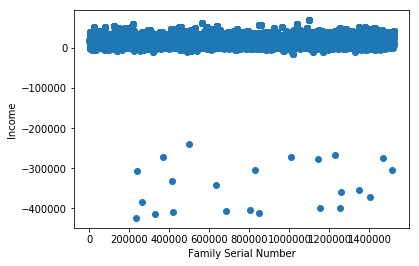

In [95]:
poverty=df[df.NYCgov_Pov_Stat==1]
not_poverty=df[df.NYCgov_Pov_Stat==2]
plt.scatter(poverty.SERIALNO,poverty.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.show()

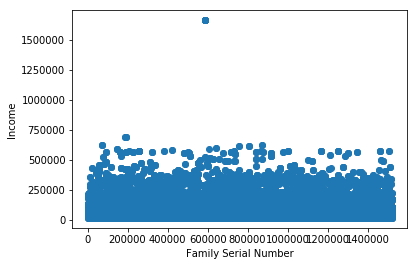

In [96]:
plt.scatter(not_poverty.SERIALNO,not_poverty.NYCgov_Income)
plt.ylabel('Income')
plt.xlabel('Family Serial Number')
plt.show()